# DND Spells Analysis - Question 1

How do common words used in spell names and descriptions vary in accordance with the classes that can use the spell?

## 1. Data Preparation

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('spells.csv')
df.head()

,name,level,school,bard,cleric,druid,paladin,ranger,sorcerer,warlock,...,trigger,range,range_type,verbal_component,somatic_component,material_component,material_component_details,duration,concentration,description
0,Acid Splash,0,evocation,False,False,False,False,False,True,False,...,NaN,60 feet,feet,True,True,False,NaN,Instantaneous,False,You create an acidic bubble at a point within ...
1,Aid,2,abjuration,True,True,True,True,True,False,False,...,NaN,30 feet,feet,True,True,True,a strip of white cloth,8 hours,False,Choose up to three creatures within range. Eac...
2,Alarm,1,abjuration,False,False,False,False,True,False,False,...,NaN,30 feet,feet,True,True,True,a bell and silver wire,8 hours,False,You set an alarm against intrusion. Choose a d...
3,Alter Self,2,transmutation,False,False,False,False,False,True,False,...,NaN,Self,self,True,True,False,NaN,"Concentration, up to 1 hour",True,You alter your physical form. Choose one of th...
4,Animal Friendship,1,enchantment,True,False,True,False,True,False,False,...,NaN,30 feet,feet,True,True,True,a morsel of food,24 hours,False,Target a Beast that you can see within range. ...


In [4]:
# only take the columns needed for the question
df = df[['name', 'bard', 'cleric', 'druid', 'paladin', 'ranger', 'sorcerer', 'warlock', 'wizard', 'description']]
df.head()

,name,bard,cleric,druid,paladin,ranger,sorcerer,warlock,wizard,description
0,Acid Splash,False,False,False,False,False,True,False,True,You create an acidic bubble at a point within ...
1,Aid,True,True,True,True,True,False,False,False,Choose up to three creatures within range. Eac...
2,Alarm,False,False,False,False,True,False,False,True,You set an alarm against intrusion. Choose a d...
3,Alter Self,False,False,False,False,False,True,False,True,You alter your physical form. Choose one of th...
4,Animal Friendship,True,False,True,False,True,False,False,False,Target a Beast that you can see within range. ...


In [5]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         314 non-null    object
 1   bard         314 non-null    bool  
 2   cleric       314 non-null    bool  
 3   druid        314 non-null    bool  
 4   paladin      314 non-null    bool  
 5   ranger       314 non-null    bool  
 6   sorcerer     314 non-null    bool  
 7   warlock      314 non-null    bool  
 8   wizard       314 non-null    bool  
 9   description  314 non-null    object
dtypes: bool(8), object(2)
memory usage: 7.5+ KB


Yay! Nothing to clean

In [6]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

In [9]:
from nltk.util import ngrams
import re
from nltk.stem import WordNetLemmatizer

# function to preprocess text
def process_text(text):
    # transform to lowercase
    text = text.lower()

    # tokenize and remove stopwords and non-words
    doc = nlp(text)
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]

    # lemmatize
    lemmatizer = WordNetLemmatizer()
    res = [lemmatizer.lemmatize(token) for token in tokens]

    return res

In [10]:
df['name_p'] = df['name'].apply(process_text)
df['description_p'] = df['description'].apply(process_text)
df.head()

,name,bard,cleric,druid,paladin,ranger,sorcerer,warlock,wizard,description,name_p,description_p
0,Acid Splash,False,False,False,False,False,True,False,True,You create an acidic bubble at a point within ...,"[acid, splash]","[create, acidic, bubble, point, range, explode..."
1,Aid,True,True,True,True,True,False,False,False,Choose up to three creatures within range. Eac...,[aid],"[choose, creature, range, target, hit, point, ..."
2,Alarm,False,False,False,False,True,False,False,True,You set an alarm against intrusion. Choose a d...,[alarm],"[set, alarm, intrusion, choose, door, window, ..."
3,Alter Self,False,False,False,False,False,True,False,True,You alter your physical form. Choose one of th...,"[alter, self]","[alter, physical, form, choose, following, opt..."
4,Animal Friendship,True,False,True,False,True,False,False,False,Target a Beast that you can see within range. ...,"[animal, friendship]","[target, beast, range, target, succeed, wisdom..."


In [38]:
# get unified lists of words for each class

classes = ['bard', 'cleric', 'druid', 'paladin', 'ranger', 'sorcerer', 'warlock', 'wizard']

names = {}
descriptions = {}

for cl in classes:
    names[cl] = [x for xx in df[df[cl] == True]['name_p'] for x in xx]
    descriptions[cl] = [x for xx in df[df[cl] == True]['description_p'] for x in xx]

## 2. Choosing Text Representation

Now we have simple lists of tokens for each class. To see if this representation is enough to highlight differences between classes, let's plot a few sample wordclouds for 3 different classes

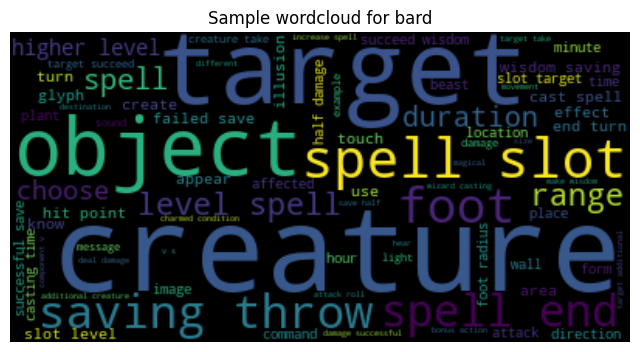

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate(' '.join(descriptions['bard']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for bard')
plt.show()

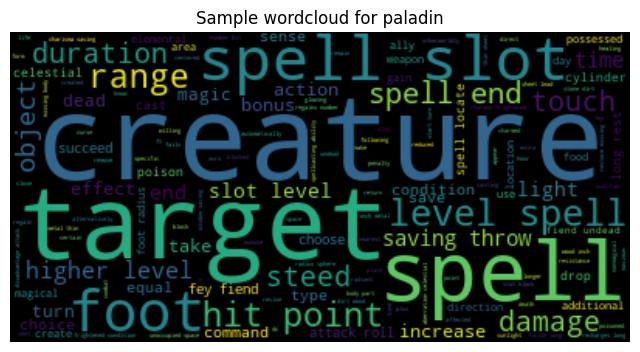

In [47]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate(' '.join(descriptions['paladin']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for paladin')
plt.show()

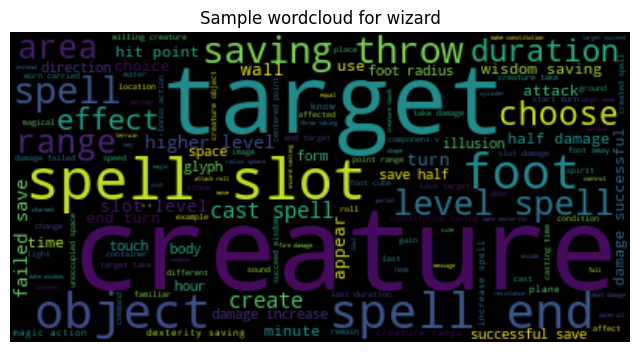

In [48]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate(' '.join(descriptions['wizard']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for wizard')
plt.show()

These wordclouds look almost identical. Let's use the TF-IDF representation to assign higher importance to class-specific words

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# get documents from lists
names_text = {cl: ' '.join(words) for cl, words in names.items()}
descriptions_text = {cl: ' '.join(words) for cl, words in descriptions.items()}

# create TF-IDF representation
vectorizer_names = TfidfVectorizer()
tfidf_matrix_names = vectorizer_names.fit_transform(names_text.values())

vectorizer_descriptions = TfidfVectorizer()
tfidf_matrix_descriptions = vectorizer_descriptions.fit_transform(descriptions_text.values())

# convert to a dataframe
names_tfidf = pd.DataFrame(tfidf_matrix_names.toarray(), index=names_text.keys(), columns=vectorizer_names.get_feature_names_out()).T
descriptions_tfidf = pd.DataFrame(tfidf_matrix_descriptions.toarray(), index=descriptions_text.keys(), columns=vectorizer_descriptions.get_feature_names_out()).T

In [76]:
names_tfidf

,bard,cleric,druid,paladin,ranger,sorcerer,warlock,wizard
ability,0.043355,0.043163,0.039450,0.000000,0.067453,0.042434,0.000000,0.033278
acid,0.000000,0.000000,0.000000,0.000000,0.000000,0.071167,0.000000,0.055811
aid,0.048695,0.048480,0.044309,0.086050,0.075762,0.000000,0.000000,0.000000
alarm,0.000000,0.000000,0.000000,0.000000,0.113127,0.000000,0.000000,0.055811
ally,0.000000,0.086375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
wisp,0.072711,0.000000,0.066162,0.000000,0.000000,0.000000,0.000000,0.000000
woodland,0.000000,0.000000,0.066162,0.000000,0.113127,0.000000,0.000000,0.000000
word,0.216773,0.215814,0.039450,0.000000,0.000000,0.084868,0.129018,0.066555
wound,0.097391,0.145440,0.088619,0.086050,0.075762,0.000000,0.000000,0.000000


Now, plot the sample wordclouds again

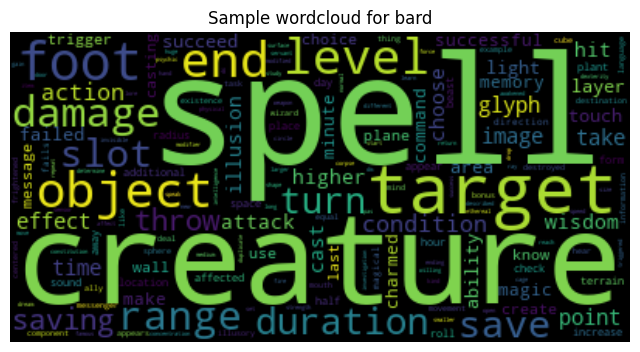

In [77]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate_from_frequencies(dict(zip(descriptions_tfidf.index, descriptions_tfidf['bard'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for bard')
plt.show()

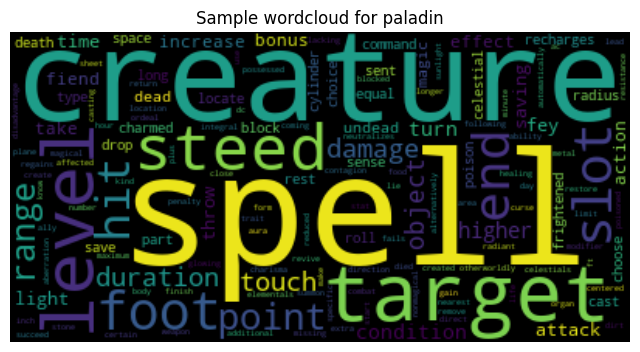

In [78]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate_from_frequencies(dict(zip(descriptions_tfidf.index, descriptions_tfidf['paladin'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for paladin')
plt.show()

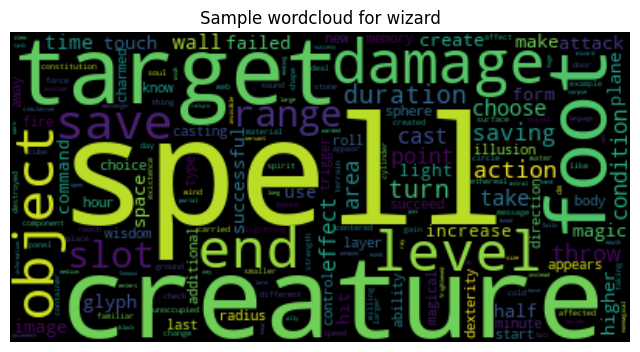

In [79]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate_from_frequencies(dict(zip(descriptions_tfidf.index, descriptions_tfidf['wizard'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for wizard')
plt.show()

This is slightly more specific, but still dominated by common words. Therefore, let's attempt to use PMI - pointwise mutual information, a measure of how strongly a word is associated with a certain class compared to random distribution

In [59]:
from collections import Counter

# get word counts
name_counts = {cl: Counter(names[cl]) for cl in classes}
description_counts = {cl: Counter(descriptions[cl]) for cl in classes}

In [64]:
# get total word counts
names_all = [x for xx in names.values() for x in xx]
descriptions_all = [x for xx in descriptions.values() for x in xx]

name_counts_total = Counter(names_all)
description_counts_total = Counter(descriptions_all)

total_names = sum(name_counts_total.values())
total_descriptions = sum(description_counts_total.values()) 

In [66]:
import numpy as np

# compute PMI scores

pmi_scores_names = {}
pmi_scores_descriptions = {}

for cl in classes:
    total_names_class = sum(name_counts[cl].values())
    total_descriptions_class = sum(description_counts[cl].values())
    
    pmi_scores_names[cl] = {}

    for word, count in name_counts[cl].items():
        p_w_given_c = count / total_names_class  # P(w | c)
        p_w = name_counts_total[word] / total_names  # P(w)
        
        if p_w_given_c > 0 and p_w > 0:
            pmi = np.log(p_w_given_c / p_w)
            pmi_scores_names[cl][word] = pmi

    pmi_scores_descriptions[cl] = {}

    for word, count in description_counts[cl].items():
        p_w_given_c = count / total_descriptions_class  # P(w | c)
        p_w = description_counts_total[word] / total_descriptions  # P(w)
        
        # Compute PMI (avoid log(0) by ensuring p_w_given_c and p_w are > 0)
        if p_w_given_c > 0 and p_w > 0:
            pmi = np.log(p_w_given_c / p_w)
            pmi_scores_descriptions[cl][word] = pmi


In [81]:
names_pmi = pd.DataFrame(pmi_scores_names).fillna(0)
names_pmi.head()

,bard,cleric,druid,paladin,ranger,sorcerer,warlock,wizard
aid,0.324613,0.389799,0.305382,1.375823,1.198142,0.000000,0.000000,0.000000
animal,0.547757,0.000000,0.933990,0.000000,1.644429,0.000000,-0.264252,0.000000
friendship,0.835439,0.000000,0.816207,0.000000,1.708968,0.000000,0.000000,0.000000
messenger,0.835439,0.000000,0.816207,0.000000,1.708968,0.000000,0.000000,0.000000
animate,0.324613,0.389799,0.000000,0.000000,0.000000,0.263417,0.000000,0.567984


In [82]:
descriptions_pmi = pd.DataFrame(pmi_scores_descriptions).fillna(0)
descriptions_pmi.head()

,bard,cleric,druid,paladin,ranger,sorcerer,warlock,wizard
choose,-0.314404,0.241067,0.261420,-0.481222,0.397261,-0.054559,-0.373803,-0.031319
creature,0.026301,0.175671,0.023873,0.150435,-0.000070,-0.146806,0.042084,-0.069904
range,0.019972,-0.044012,-0.008039,-0.069248,0.088338,0.142184,0.032894,-0.102710
target,0.133572,-0.078242,-0.111685,0.143930,-0.147012,-0.023043,0.244050,-0.065123
hit,-0.101088,0.135628,0.114625,0.896796,-0.277845,-0.094787,0.072176,-0.187725


Plot the sample wordclouds again

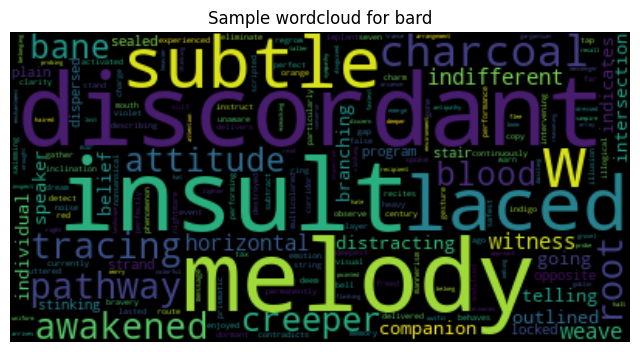

In [83]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate_from_frequencies(dict(zip(descriptions_pmi.index, descriptions_pmi['bard'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for bard')
plt.show()

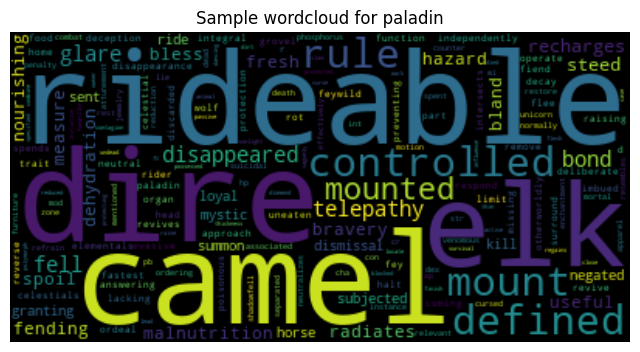

In [84]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate_from_frequencies(dict(zip(descriptions_pmi.index, descriptions_pmi['paladin'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for paladin')
plt.show()

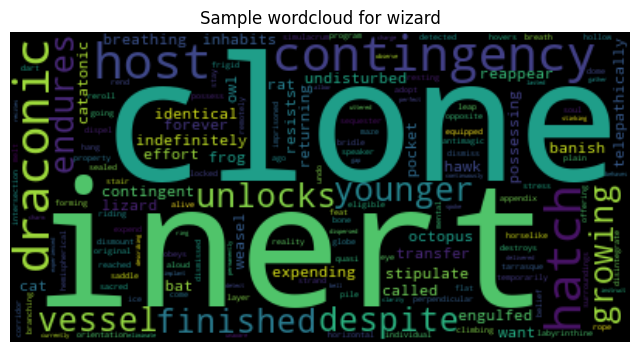

In [85]:
plt.figure(figsize=(8, 5))
wordcloud = WordCloud().generate_from_frequencies(dict(zip(descriptions_pmi.index, descriptions_pmi['wizard'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample wordcloud for wizard')
plt.show()

Great! This approach yielded the most class-specific words

## 3. Creating the Final Interactive Visualization

In [88]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import io
import base64

# initialize Dash app
app = dash.Dash(__name__)

# layout
app.layout = html.Div([
    html.H1('Words Specific for DND Class Spells: Interactive Dashboard'),
    
    # dropdown for class selection
    dcc.Dropdown(
        id='class-filter',
        options=[{'label': cl, 'value': cl} for cl in classes],
        value=['wizard'],
        multi=True,
        clearable=False,
    ),

    # dropdown to switch between names and descriptions
    dcc.Dropdown(
        id='column-filter',
        options=[
            {'label': 'Spell Names', 'value': 'names'},
            {'label': 'Spell Descriptions', 'value': 'descriptions'}
        ],
        value='names',
        clearable=False,
    ),

    # wordcloud output (image)
    html.Img(id='wordcloud', style={'width': '100%', 'height': 'auto'})
])

# update chart based on region selection
@app.callback(
    Output('wordcloud', 'src'),
    [Input('class-filter', 'value'),
     Input('column-filter', 'value')]
)
def update_wordcloud(selected_classes, selected_column):
    
    # select the correct dataset 
    if selected_column == 'names':
        data = names_pmi.copy()
    elif selected_column == 'descriptions':
        data = descriptions_pmi.copy()

    # filter by selected classes
    if selected_classes:
        data = data[selected_classes].sum(axis=1)
    
    # generate wordcloud
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data.to_dict())

    # convert wordcloud to image
    img = io.BytesIO()
    wc.to_image().save(img, format='PNG')
    img.seek(0)

    # encode image to display in Dash
    encoded_img = base64.b64encode(img.getvalue()).decode()
    return f'data:image/png;base64,{encoded_img}'


# run
if __name__ == '__main__':
    app.run(port=8050, debug=True, use_reloader=False)
